In [5]:
CODE_DIR = "/home/cbarkhof/fall-2021"
import sys
sys.path.append(CODE_DIR)

In [14]:
import os
import torch

from dataset_dataloader import get_n_data_samples_x_y
from analysis_run_postprocessing.general_postprocessing_steps import make_run_overview_df

In [7]:
N_LENGTHS = 2000

EXPORT_DIR = f"{CODE_DIR}/analysis_run_postprocessing/run_postprocess_files"
CHECKPOINT_DIR = f"{CODE_DIR}/run_files/checkpoints"

SAMPLE_FILE = f"generative-samples.pt"
CONDITIONAL_SAMPLE_FILE = f"generative-conditional-samples.pt"
ENCODING_FILE = "encodings.pt"

EVALUATION_RESULT_FILE = "evaluation-results.pt"
SURPRISAL_DATA_FILE = "surprisal_data.pt"

DEVICE = "cuda:0"

In [25]:
# ---------------------------------
# PTB
ptb_train_inputs, ptb_train_atts = get_n_data_samples_x_y(
    language_dataset_name="ptb",
    image_or_language="language", 
    shuffle=False,
    N_samples=N_LENGTHS, 
    phase="train")

ptb_valid_inputs, ptb_valid_atts = get_n_data_samples_x_y(
    language_dataset_name="ptb",
    image_or_language="language", 
    shuffle=False,
    N_samples=3370, #  <-- ALL !
    phase="valid")

Is file!
train 42068
validation 3370
test 3761
Returns concatted input_ids, attention_masks tensors
Is file!
train 42068
validation 3370
test 3761
Returns concatted input_ids, attention_masks tensors


In [26]:
def get_length_of_chunk(chunk, eos_token_id=2, bos_token=0, remove_start=False):
    lens = []
    for s_i in chunk.tolist():
        # if it is a weak decoder, the start token needs to be cut-off as well (if predicted)
        if s_i[0] == bos_token and remove_start:
            s_i = s_i[1:]
        length = s_i.index(eos_token_id) if eos_token_id in s_i else len(s_i)
        lens.append(length)
    return lens

In [27]:
ptb_valid_lens = get_length_of_chunk(ptb_valid_inputs, remove_start=True)
ptb_train_lens = get_length_of_chunk(ptb_train_inputs, remove_start=True)

1 62
1 62


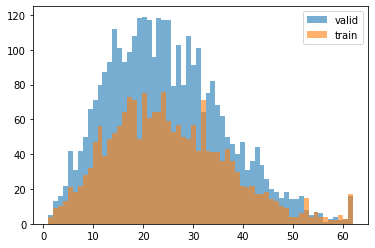

3370 3370
2000 2000


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

print(min(ptb_valid_lens), max(ptb_valid_lens))
print(min(ptb_train_lens), max(ptb_train_lens))
plt.hist(ptb_valid_lens, bins=62, alpha=0.6, label="valid")
plt.hist(ptb_train_lens, bins=62, alpha=0.6, label="train")
plt.legend()
plt.show()

print(len(ptb_valid_lens), len(ptb_valid_inputs))
print(len(ptb_train_lens), len(ptb_train_inputs))

In [29]:
prefixes = ["(5-jan ptb-test)", "(4-jan ptb-test)"]

run_df = make_run_overview_df(prefixes=prefixes)
run_df.head()

,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,1000,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,1000,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Weak-M roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,100,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Strong roBERTa,INFO-VAE,0.1,ptb,language,0,0,0,100,strong_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mm..."
INFO-VAE l_Rate 1 l_MMD 10 dec: Weak-M roBERTa,INFO-VAE,1,ptb,language,0,0,0,10,weak_memory_distil_roberta_decoder,"(5-jan ptb-test) INFO-VAE[l_1_rate=1.0, l_2_mm..."


In [30]:
all_samples = dict()

for i, (idx, row) in enumerate(run_df.iterrows()):
    print(idx)
    print(row.run_name)
    
    save_dir = f"{EXPORT_DIR}/{row.run_name}"
    conditional_sample_file = f"{save_dir}/{CONDITIONAL_SAMPLE_FILE}"
    sample_file = f"{save_dir}/{SAMPLE_FILE}"
    
    if not (os.path.exists(conditional_sample_file) or os.path.exists(sample_file)):
        print("Samples not present for run, skipping")
    
    else:
        conditional_samples = torch.load(conditional_sample_file)
        samples = torch.load(sample_file)
        
        all_samples[idx] = dict(
            condition=conditional_samples["valid"]["original_input_ids"].cpu(),
            conditional_sample=conditional_samples["valid"]["cond_sample_x"].cpu(),
            sample=samples["x"].cpu()
        )

INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa
(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mmd=1000.0] | WEAK | Nz=32
INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa
(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mmd=1000.0] | STRONG | Nz=32
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Weak-M roBERTa
(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mmd=100.0] | WEAK | Nz=32
INFO-VAE l_Rate 0.1 l_MMD 100 dec: Strong roBERTa
(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mmd=100.0] | STRONG | Nz=32
INFO-VAE l_Rate 1 l_MMD 10 dec: Weak-M roBERTa
(5-jan ptb-test) INFO-VAE[l_1_rate=1.0, l_2_mmd=10.0] | WEAK | Nz=32
INFO-VAE l_Rate 1 l_MMD 1 dec: Weak-M roBERTa
(5-jan ptb-test) INFO-VAE[l_1_rate=1.0, l_2_mmd=1.0] | WEAK | Nz=32
INFO-VAE l_Rate 0.1 l_MMD 10 dec: Weak-M roBERTa
(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mmd=10.0] | WEAK | Nz=32
INFO-VAE l_Rate 0.1 l_MMD 1 dec: Weak-M roBERTa
(5-jan ptb-test) INFO-VAE[l_1_rate=0.1, l_2_mmd=1.0] | WEAK | Nz=32
INFO-VAE l_Rate 0.1 l_MMD 10 dec: Strong roBERTa

In [31]:
# temp = all_samples["(4-jan ptb-test) B-VAE[b=1.0] | STRONG | Nz=32"]
# print(temp["condition"][0])
# print(temp["conditional_sample"][0])
# print(temp["sample"][0])

In [32]:
all_lengths = dict()

for run_name, samples in all_samples.items():
    
    all_lengths[run_name] = dict()
    
    weak = False
    if "weak" in run_name.lower():
        weak = True
    
    for k, v in samples.items():
        
        # DATA SAMPLE
        if k == "condition":
            lengths = get_length_of_chunk(v, remove_start=True)
            
        # MODEL SAMPLE
        else:
            # to avoid lens > 62 only get the reasonable predictions
            if weak:
                lengths = get_length_of_chunk(v[:, 1:-1], remove_start=False)
            else:
                lengths = get_length_of_chunk(v[:, :-1], remove_start=False)
        
        all_lengths[run_name][k] = lengths

## Check order of the validation set and the conditional samples

-> Should be all of the same length and same order!

In [33]:
for run_name, lengths in all_lengths.items():
    print(run_name)
    print(lengths["condition"][:20])
    print(len(lengths["condition"]))
    
    print()

print(ptb_valid_lens[:20])
print(len(ptb_valid_lens))

INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Weak-M roBERTa
[16, 34, 24, 23, 21, 15, 31, 41, 20, 32, 34, 24, 31, 13, 42, 24, 12, 37, 16, 26]
3370

INFO-VAE l_Rate 0.1 l_MMD 1000 dec: Strong roBERTa
[16, 34, 24, 23, 21, 15, 31, 41, 20, 32, 34, 24, 31, 13, 42, 24, 12, 37, 16, 26]
3370

INFO-VAE l_Rate 0.1 l_MMD 100 dec: Weak-M roBERTa
[16, 34, 24, 23, 21, 15, 31, 41, 20, 32, 34, 24, 31, 13, 42, 24, 12, 37, 16, 26]
3370

INFO-VAE l_Rate 0.1 l_MMD 100 dec: Strong roBERTa
[16, 34, 24, 23, 21, 15, 31, 41, 20, 32, 34, 24, 31, 13, 42, 24, 12, 37, 16, 26]
3370

INFO-VAE l_Rate 1 l_MMD 10 dec: Weak-M roBERTa
[16, 34, 24, 23, 21, 15, 31, 41, 20, 32, 34, 24, 31, 13, 42, 24, 12, 37, 16, 26]
3370

INFO-VAE l_Rate 1 l_MMD 1 dec: Weak-M roBERTa
[16, 34, 24, 23, 21, 15, 31, 41, 20, 32, 34, 24, 31, 13, 42, 24, 12, 37, 16, 26]
3370

INFO-VAE l_Rate 0.1 l_MMD 10 dec: Weak-M roBERTa
[16, 34, 24, 23, 21, 15, 31, 41, 20, 32, 34, 24, 31, 13, 42, 24, 12, 37, 16, 26]
3370

INFO-VAE l_Rate 0.1 l_MMD 1 dec: Weak-M roBERTa

In [34]:
all_lens = {
    "data_group": dict(train=ptb_train_lens, valid=ptb_valid_lens),
    "model_groups": all_lengths
}
torch.save(all_lens, "ptb_length_analysis_data.pt")